In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../Data/process/8#Belt Conveyer.csv")
df.shape

/var/folders/q8/lvj6ms8d6g371mc9cl99f_6w0000gn/T/ipykernel_29412/3601637381.py:4: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/process/8#Belt Conveyer.csv")


(2716206, 11)

In [2]:
df.head()

,id,Measurement,Date,Time,data,unit,device,location,Device,Metric,Rating
0,67c29bab30e6dd385f031c98,Vibration Velocity Z,2025-04-15,23:33:25,7.21402,mm/s,8#Belt Conveyer,Motor Drive End,NaN,NaN,NaN
1,67c29bab30e6dd385f031c98,Vibration Velocity Z,2025-04-15,23:33:20,7.05352,mm/s,8#Belt Conveyer,Motor Drive End,NaN,NaN,NaN
2,67c29bab30e6dd385f031c98,Vibration Velocity Z,2025-04-15,23:33:15,6.16625,mm/s,8#Belt Conveyer,Motor Drive End,NaN,NaN,NaN
3,67c29bab30e6dd385f031c98,Vibration Velocity Z,2025-04-15,23:33:10,5.46583,mm/s,8#Belt Conveyer,Motor Drive End,NaN,NaN,NaN
4,67c29bab30e6dd385f031c98,Vibration Velocity Z,2025-04-15,23:33:05,6.51545,mm/s,8#Belt Conveyer,Motor Drive End,NaN,NaN,NaN


In [3]:
df.tail()

,id,Measurement,Date,Time,data,unit,device,location,Device,Metric,Rating
2716201,67c29bab30e6dd385f031caa,Low-Frequency Acceleration Z,2025-04-01,00:00:20,1.59756,m/s2,8#Belt Conveyer,Gear Reducer,NaN,NaN,NaN
2716202,67c29bab30e6dd385f031caa,Low-Frequency Acceleration Z,2025-04-01,00:00:15,1.61798,m/s2,8#Belt Conveyer,Gear Reducer,NaN,NaN,NaN
2716203,67c29bab30e6dd385f031caa,Low-Frequency Acceleration Z,2025-04-01,00:00:10,1.56861,m/s2,8#Belt Conveyer,Gear Reducer,NaN,NaN,NaN
2716204,67c29bab30e6dd385f031caa,Low-Frequency Acceleration Z,2025-04-01,00:00:05,1.67884,m/s2,8#Belt Conveyer,Gear Reducer,NaN,NaN,NaN
2716205,67c29bab30e6dd385f031caa,Low-Frequency Acceleration Z,2025-04-01,00:00:00,1.58601,m/s2,8#Belt Conveyer,Gear Reducer,NaN,NaN,NaN


In [4]:
df.describe()

,data,Rating
count,2.703332e+06,12874.000000
mean,7.635116e+00,90.186641
std,1.274296e+01,8.428511
min,1.541000e-02,62.650000
25%,1.958680e+00,86.370000
50%,2.465040e+00,91.250000
75%,3.306165e+00,97.440000
max,4.168526e+02,98.950000


In [5]:
df.isnull().sum()

id               12874
Measurement      12874
Date                 0
Time                 0
data             12874
unit             12874
device               0
location             0
Device         2703332
Metric         2703332
Rating         2703332
dtype: int64

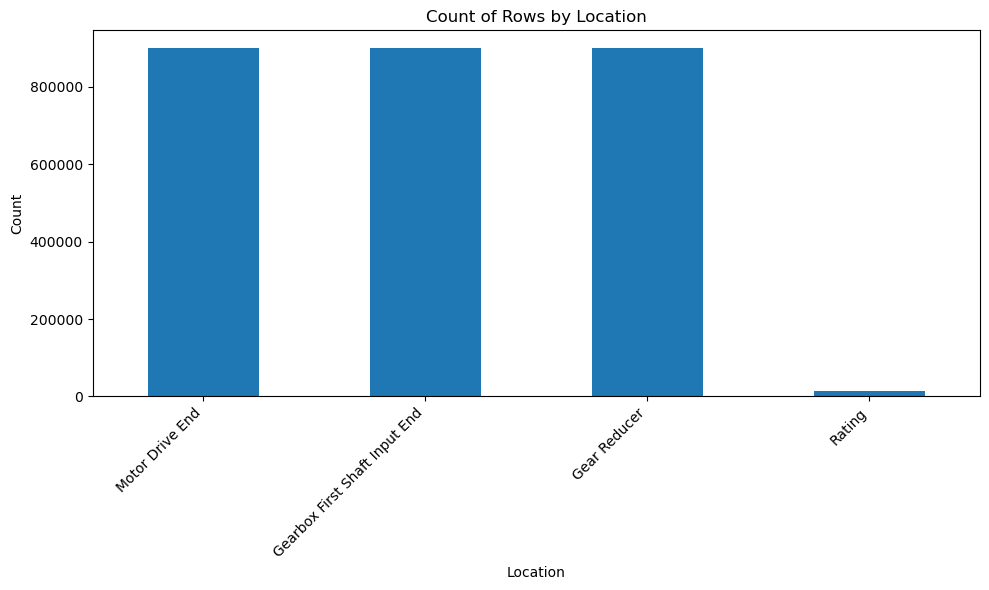

In [6]:
location_counts = df['location'].value_counts()

plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar')

plt.title('Count of Rows by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
unique_metrics = df['Metric'].unique()
print("Unique Metrics:")
print(unique_metrics)

unique_measurements = df['Measurement'].unique()
print("\nUnique Measurements:")
print(unique_measurements)

Unique Metrics:
[nan 'velocity_rms' 'crest_factor' 'kurtosis_opt' 'rms_1_10khz'
 'rms_10_25khz' 'peak_value_opt' 'rotor_balance_status' 'alignment_status'
 'fit_condition' 'bearing_lubrication' 'rubbing_condition'
 'electromagnetic_status']

Unique Measurements:
['Vibration Velocity Z' 'High-Frequency Acceleration' 'Temperature'
 'Low-Frequency Acceleration Z' nan]


In [8]:
pivot_df = df.copy().drop(columns=['Device','Metric','Rating']).dropna()
pivot_df = pivot_df.pivot_table(
    index=['id', 'Date', 'Time', 'device', 'location'],
    columns='Measurement',
    values='data'
)
pivot_df = pivot_df.reset_index()

pivot_df.head()

Measurement,id,Date,Time,device,location,High-Frequency Acceleration,Low-Frequency Acceleration Z,Temperature,Vibration Velocity Z
0,67c29bab30e6dd385f031c98,2025-04-01,00:00:00,8#Belt Conveyer,Motor Drive End,2.57576,2.00625,19.6,7.17157
1,67c29bab30e6dd385f031c98,2025-04-01,00:00:05,8#Belt Conveyer,Motor Drive End,2.90726,2.36483,NaN,5.55355
2,67c29bab30e6dd385f031c98,2025-04-01,00:00:10,8#Belt Conveyer,Motor Drive End,2.57396,2.03293,19.6,7.33415
3,67c29bab30e6dd385f031c98,2025-04-01,00:00:15,8#Belt Conveyer,Motor Drive End,2.90597,2.34161,NaN,5.66170
4,67c29bab30e6dd385f031c98,2025-04-01,00:00:20,8#Belt Conveyer,Motor Drive End,2.62391,2.05697,19.6,7.27275


In [9]:
target_df = df.copy().drop(columns=['id', 'Measurement', 'data','unit','device']).dropna()
target_df = target_df.pivot_table(
    index=['Date', 'Time', 'location', 'Device'],
    columns='Metric',
    values='Rating'
)
target_df = target_df.reset_index()
target_df.head()

Metric,Date,Time,location,Device,alignment_status,bearing_lubrication,crest_factor,electromagnetic_status,fit_condition,kurtosis_opt,peak_value_opt,rms_10_25khz,rms_1_10khz,rotor_balance_status,rubbing_condition,velocity_rms
0,2025-04-01,00:00:01,Rating,8#Belt Conveyer,87.60,97.33,89.46,98.0,90.28,85.64,90.46,98.0,96.92,80.49,96.03,70.13
1,2025-04-01,00:20:00,Rating,8#Belt Conveyer,81.82,97.20,90.18,98.0,88.27,85.67,91.07,98.0,96.96,81.14,95.72,70.20
2,2025-04-01,00:40:00,Rating,8#Belt Conveyer,80.44,97.53,90.27,98.0,85.31,85.62,90.97,98.0,97.12,87.75,96.19,72.96
3,2025-04-01,01:00:01,Rating,8#Belt Conveyer,87.37,96.95,88.68,98.0,90.40,84.43,90.21,98.0,96.86,85.51,96.10,66.50
4,2025-04-01,01:20:00,Rating,8#Belt Conveyer,81.15,97.80,90.78,98.0,84.47,85.55,91.74,98.0,97.06,87.85,96.95,69.16


In [10]:
pivot_df.to_csv("../Data/process/conveyer_belt_feature.csv", index=False)

In [11]:
pivot_df.to_csv("../Data/process/conveyer_belt_target.csv", index=False)